<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/Misc/blob/master/RBFN_autoencoder_noise_Removal_filesave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-183312-Tue-Mar-31-2020.wget.sh
!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-135016-Mon-Apr-6-2020.wget.sh


--2020-04-06 14:06:51--  http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-135016-Mon-Apr-6-2020.wget.sh
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2233 (2.2K) [application/x-sh]
Saving to: ‘amiBuild-135016-Mon-Apr-6-2020.wget.sh’

amiBuild-135016-Mon 100%[===================>]   2.18K  --.-KB/s    in 0s      

2020-04-06 14:06:51 (301 MB/s) - ‘amiBuild-135016-Mon-Apr-6-2020.wget.sh’ saved [2233/2233]



In [3]:
!sh amiBuild-135016-Mon-Apr-6-2020.wget.sh

--2020-04-06 14:06:59--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-01.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’

ES2008a.Array1-01.w 100%[===================>]  31.84M  41.3MB/s    in 0.8s    

2020-04-06 14:07:00 (41.3 MB/s) - ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’ saved [33387564/33387564]

--2020-04-06 14:07:00--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-02.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES20

In [1]:
!nvidia-smi

Mon Apr  6 14:06:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

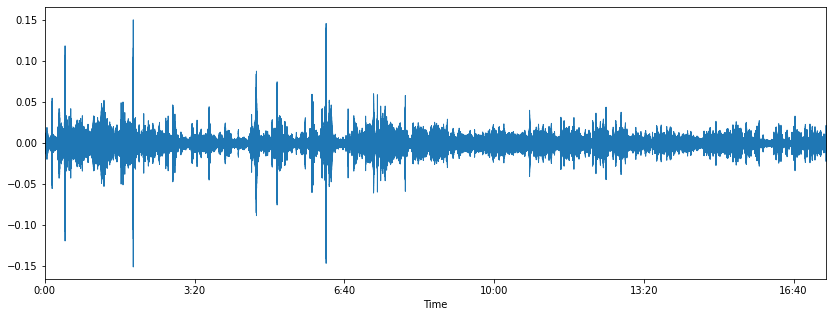

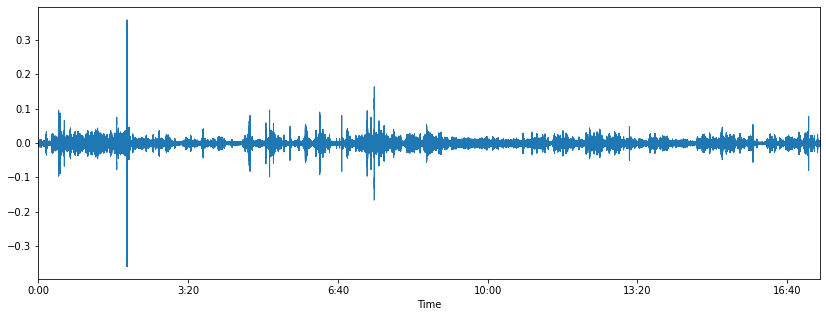

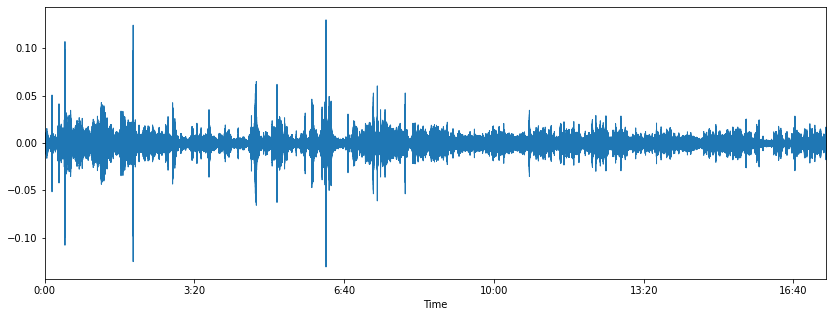

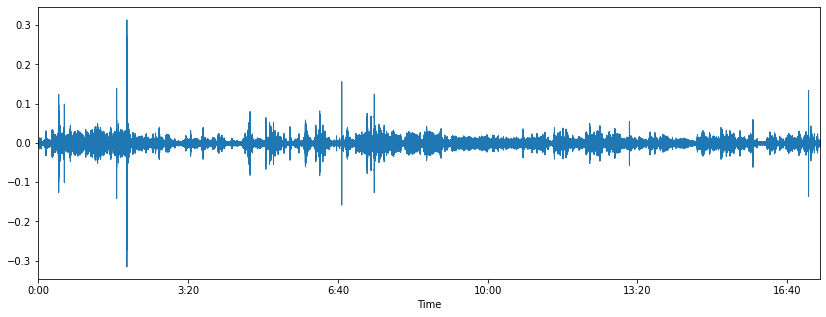

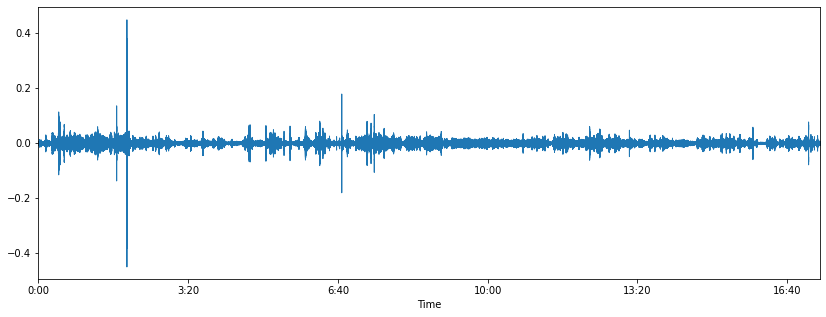

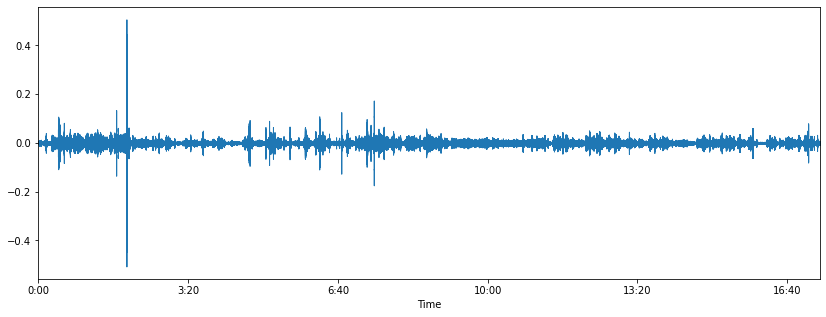

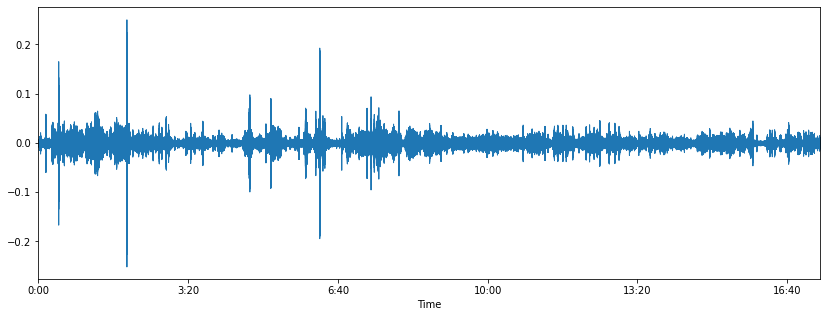

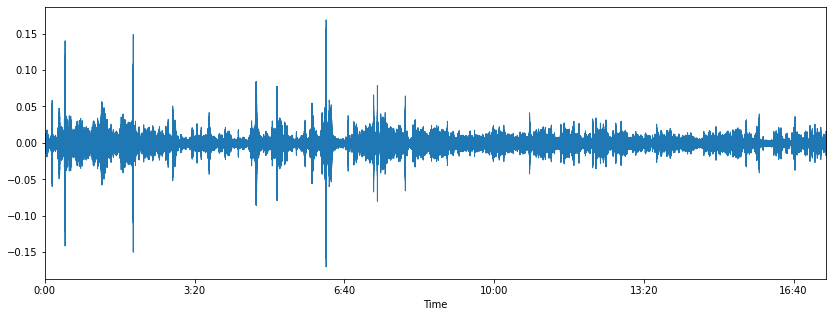

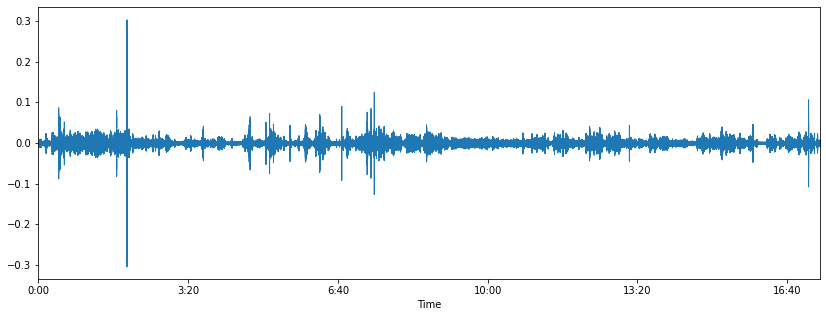

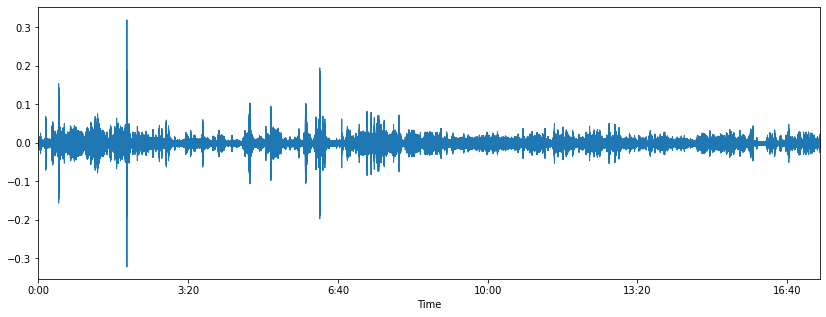

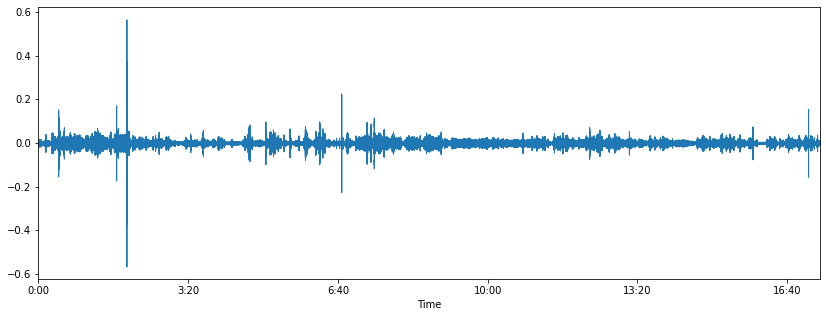

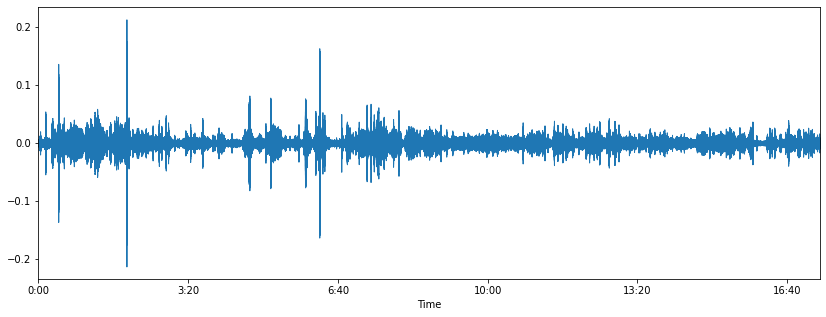

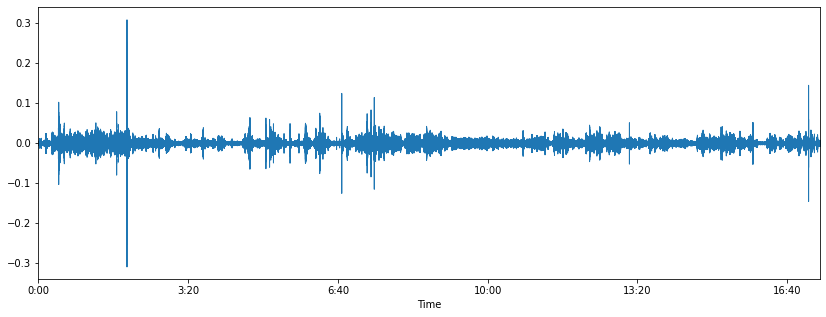

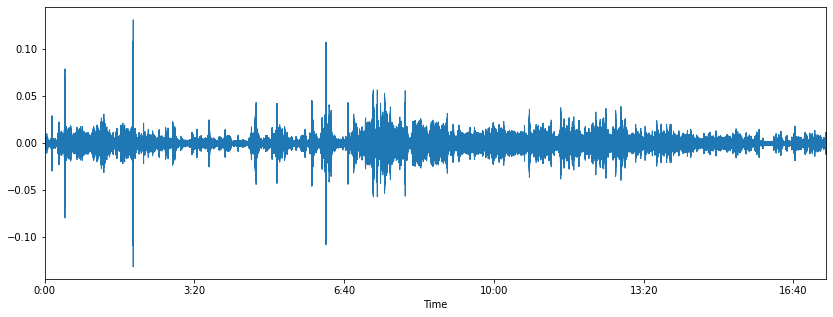

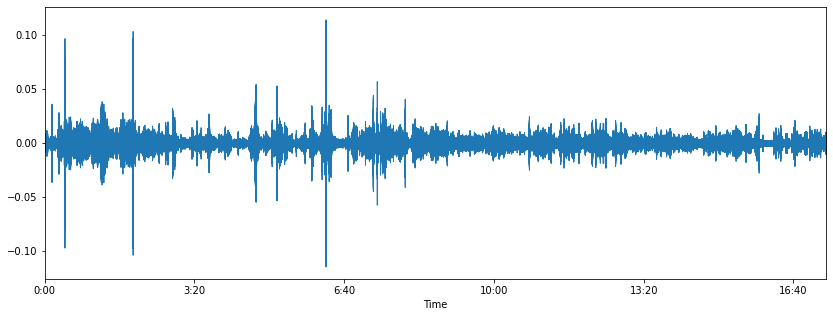

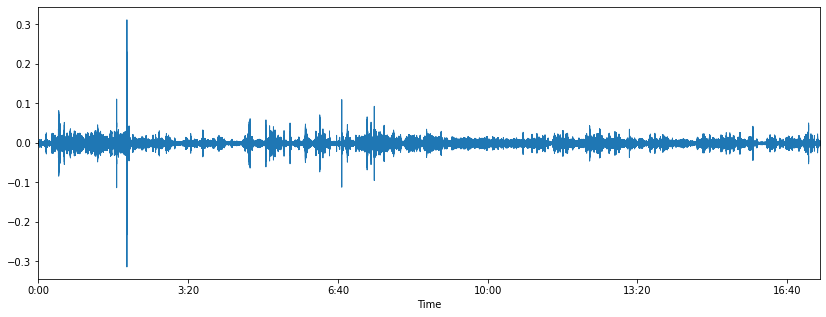

In [4]:
import librosa
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# loop over all files in the current directory ending with .txt
for fname in glob("/content/amicorpus/ES2008a/audio/*.wav"):
  x , sr = librosa.load(fname)
  import librosa.display
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x,sr=sr)

In [5]:
x.shape

(23006088,)

In [0]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import RandomUniform, Initializer, Constant

In [7]:
x.shape


(23006088,)

In [10]:
from glob import glob
import numpy as np
import librosa
X = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
#for fname in glob("/content/amicorpus/ES2011a/audio/*.wav"):
for fname in glob("/content/amicorpus/ES2008a/audio/*.wav"):  
    #struct = fname.split('_')
    #digit = struct[0]
    print(fname)
    wav, sr = librosa.load(fname)
    padded = pad(wav, 3000)
    X.append(padded)

/content/amicorpus/ES2008a/audio/ES2008a.Array2-02.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-07.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-03.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-04.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-02.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-08.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-06.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-04.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-06.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-08.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-03.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-07.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-05.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-01.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array2-05.wav
/content/amicorpus/ES2008a/audio/ES2008a.Array1-01.wav


In [0]:

 
X=np.vstack(X)



In [12]:
X.shape

(16, 3000)

In [0]:
#dont run this ..this is not used 
rbflayer = RBFLayer(X.shape[0],
                        initializer=InitCentersRandom(X),
                        betas=1.0,
                        input_shape=(X.shape[1],))

check


In [0]:
#dont run this 
model = Sequential()
model.add(rbflayer)

build inside
[15  4 10  1 14  2 12 12 12 14  3 14 10  0  5  6]
call check


In [0]:
#new way RBF 
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


In [0]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(1,X.shape[1])))
model.add(RBFLayer(100, 0.5))

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3000)              0         
_________________________________________________________________
rbf_layer_9 (RBFLayer)       (None, 100)               300000    
Total params: 300,000
Trainable params: 300,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
#now decode it
model.add(RBFLayer(3000, 0.5))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3000)              0         
_________________________________________________________________
rbf_layer (RBFLayer)         (None, 100)               300000    
_________________________________________________________________
rbf_layer_1 (RBFLayer)       (None, 3000)              300000    
Total params: 600,000
Trainable params: 600,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
X.shape

(16, 3000)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3)

In [20]:
X_train.shape,X_test.shape


((11, 3000), (5, 3000))

In [21]:
model.fit(X_train,X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
1/1 [==============================] - 0s 204ms/step - loss: 0.0179 - val_loss: 0.0097
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 0.0104 - val_loss: 0.0056
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 7/100
1/1 [==============================] - 0s 41ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 8/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 10/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 11/100
1/1 [

In [22]:
y=model.predict(X_test)

In [25]:
y.shape,
print(y)

[[5.2948621e-05 3.9440944e-05 2.2668824e-05 ... 1.5182907e-04
  1.5363285e-04 1.4252035e-04]
 [5.1460855e-05 3.8319784e-05 2.2006503e-05 ... 1.4779941e-04
  1.4955831e-04 1.3872347e-04]
 [5.1033607e-05 3.7992435e-05 2.1816222e-05 ... 1.4664042e-04
  1.4836912e-04 1.3762475e-04]
 [5.6204201e-05 4.1893436e-05 2.4137880e-05 ... 1.6070197e-04
  1.6254479e-04 1.5086938e-04]
 [5.0562099e-05 3.7649243e-05 2.1621709e-05 ... 1.4543961e-04
  1.4709971e-04 1.3648292e-04]]


In [0]:
#import os
#os.chdir(give ur local path) then run below so it can be saved
for i in range(y.shape[0]):
  #give full path here before file_  ex - give local path of ur system if needed
  f = open("file_"+str(i)+".wav","wb")
  data=y[i]
  librosa.output.write_wav(f,data,sr=sr)
  

/content/file_0.wav
/content/file_3.wav
/content/file_4.wav
/content/file_1.wav
/content/file_2.wav


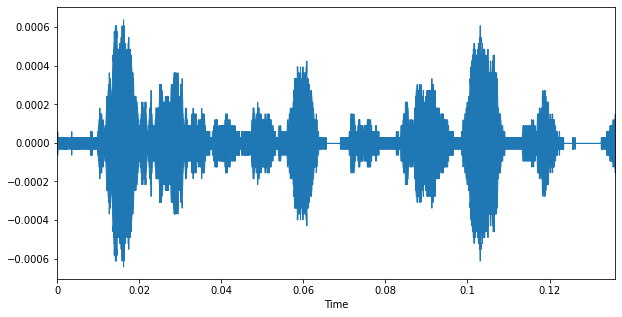

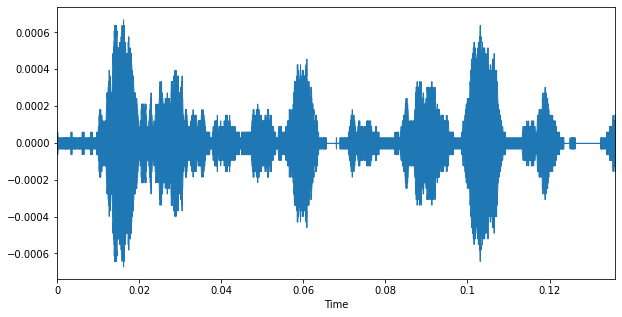

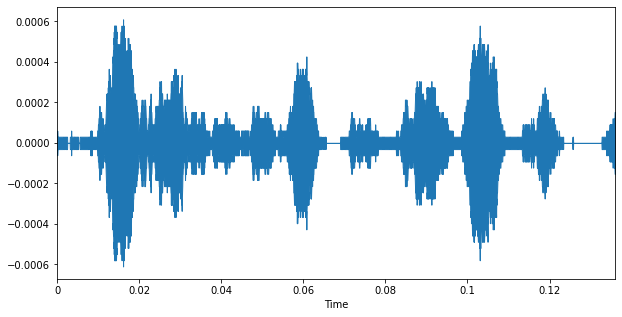

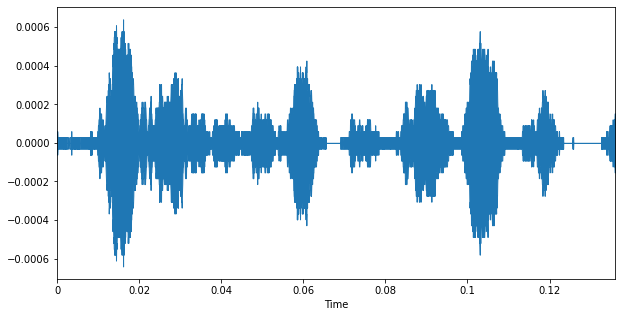

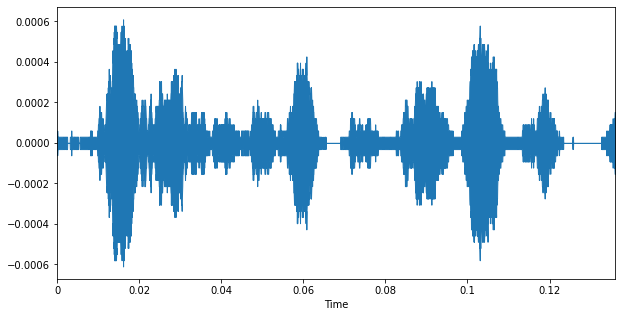

In [34]:
import librosa
import librosa.display
#librosa.display.waveplot(y,sr=sr)
#change path here if u r having local path , wherever ur file is 
for fname in glob("/content/file_*.wav"):
  print(fname)
  x1 , sr = librosa.load(fname)
  plt.figure(figsize=(10, 5))
  librosa.display.waveplot(x1,sr=sr)